<a href="https://colab.research.google.com/github/NaomyChemungor/AI_Autumn2023/blob/main/AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist

# train_images = X_train
# train_labels = y_train
# test_images = X_test
# test_labels = y_test

# Split the dataset into training and testing sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(type(y_train))

<class 'numpy.ndarray'>


In [ ]:
# Normalize the pixel values to the range [0, 1]
#X_train, X_test = X_train / 255.0, X_test / 255.0

# Normalize the pixel values to the range -1 to 1(Feature Scaling)
X_train = (X_train.astype(np.float32) / 127.5) - 1.0
X_test = (X_test.astype(np.float32) / 127.5) - 1.0

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(type(X_train))
# a single image array (28x28):
print(X_train[0].shape)
#print(X_train[0])

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
<class 'numpy.ndarray'>
(28, 28)


In [ ]:
from cv2 import resize

# Loop through the images, resize them to 16x16

X_train_res16 = []
for image in X_train:
    resized_image = resize(image, (16, 16))
    X_train_res16.append(resized_image)
X_train_res16 = np.array(X_train_res16)

X_test_res16 = []
for image in X_test:
    resized_image = resize(image, (16, 16))
    X_test_res16.append(resized_image)
X_test_res16 = np.array(X_test_res16)

print(X_train_res16.shape)
print(X_test_res16.shape)

(60000, 16, 16)
(10000, 16, 16)


In [ ]:
# Normalize the pixel values to the range [0, 1]
#X_train_res16, X_test_res16 = X_train_res16 / 255.0, X_test_res16 / 255.0

print(X_train_res16[0])

[[-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1.         -0.94485295 -0.7879902
  -0.28186268  0.12401959  0.29313725  0.61446077  0.6204657   0.42512256
   0.84105396 -0.39865196 -1.         -1.        ]
 [-1.         -1.         -1.         -1.         -0.13774511  0.9843137
   0.9843137   0.9843137   0.80490196  0.9632353  -0.35870096 -0.5980392
  -0.7567402  -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1.         -0.794

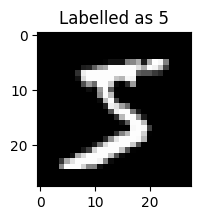

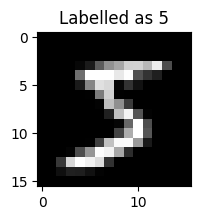

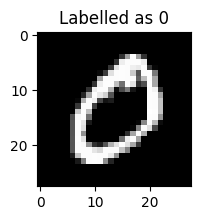

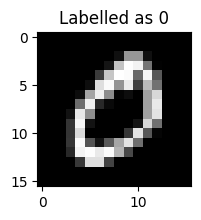

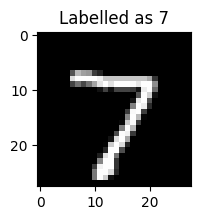

In [ ]:
# Extract and display the selected image
def display_dig_img(X_set, y_set, image_index):
  plt.figure(figsize=(2, 2))
  plt.imshow(X_set[image_index], cmap='gray')  # Display the image in grayscale
  plt.title(f"Labelled as {y_set[image_index]}")
  #plt.axis('off')  # Hide axis labels
  plt.show()

display_dig_img(X_train, y_train, 0)
display_dig_img(X_train_res16, y_train, 0)
display_dig_img(X_train, y_train, 1)
display_dig_img(X_train_res16, y_train, 1)
display_dig_img(X_test, y_test, 0)

In [ ]:
# Flatten the original images to 1D
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
print(X_train_flat.shape)
print(X_test_flat.shape)
#print(X_train_flat[0])

(60000, 784)
(10000, 784)


In [ ]:
# Flatten the resized images
X_train_res16_flat = X_train_res16.reshape(X_train_res16.shape[0], -1)
X_test_res16_flat = X_test_res16.reshape(X_test_res16.shape[0], -1)
print(X_train_res16_flat.shape)
print(X_test_res16_flat.shape)

(60000, 256)
(10000, 256)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
# Convert labels to one-hot encoding - needed for NN
print(y_train[0])
y_train_ohe = to_categorical(y_train, 10)
y_test_ohe = to_categorical(y_test, 10)
print(y_train_ohe[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
'''
def init_weights2(input_pixels):
  # rand - random samples from a uniform distribution over [0, 1)
  weights = np.random.rand(input_pixels, 10) # input_features x output neurons
  return weights
'''

# to be used for the hidden layer(s)
def relu(x):
  return max(0, x)

# He initialization https://doi.org/10.48550/arXiv.1502.01852
def init_weights_he(input_pixels):
  # Calculate the standard deviation based on the formula
  std_dev = np.sqrt(2 / input_pixels)

  # Generate random numbers with a normal distribution
  weights = np.random.normal(loc=0.0, scale=std_dev, size=(input_pixels, 10))

  # Verify the mean and standard deviation of the generated numbers
  mean_generated = np.mean(weights)
  std_dev_generated = np.std(weights)
  print("He Distribution Mean:", mean_generated)
  print("He Distribution Standard Deviation:", std_dev_generated)
  return weights

 # to be used for the output layer - will return an array of probabilities where each element represents the probability of a class. The sum of all probabilities will be equal to 1
def softmax(logits):
    exp_logits = np.exp(logits)
    sum_exp_logits = np.sum(exp_logits)
    probabilities = exp_logits / sum_exp_logits
    return probabilities

# to be used with Sigmoid, Tanh and Sigmoid activation
# Xavier Glorot initialization
# Uniform Xavier Init
def init_weights_xavier(input_neurons, output_neurons):

    # Calculate the range for random initialization
    limit = np.sqrt(6 / (input_neurons + output_neurons))

    # Generate random weights within the specified range
    weights = np.random.uniform(-limit, limit, size=(input_neurons, output_neurons))

    return weights


biases = np.zeros(10)  # 1 bias for each output neuron

weights = init_weights_xavier(256, 10)
#print(f'Weights: \n{weights}')
#print(f'Biases: \n{biases}')
#print(f'Image: \n{X_train_res16_flat[0]}')

logits = np.dot(X_train_res16_flat[0], weights)+biases
#result = np.vectorize(relu)(result)  # <=> result = np.maximum(0, result)

probabilities = softmax(logits)
print(probabilities)
print(f'Weights: \n{weights}')


#print(f'Image: \n{X_train_res16_flat[0]}')
#     a = ReLU(np.dot(weights, a)+biases)


[0.42725601 0.07969336 0.01436603 0.00188778 0.14915122 0.02656996
 0.06352419 0.22083039 0.00767851 0.00904255]
Weights: 
[[ 0.03922335 -0.11857001 -0.10608504 ...  0.14492742 -0.1146616
  -0.05406428]
 [-0.07218638  0.09369172  0.00630813 ...  0.10993444 -0.06676351
   0.08507965]
 [ 0.0237749  -0.14024863 -0.04131761 ... -0.07716783 -0.06856268
   0.06922663]
 ...
 [-0.08945132  0.06535991 -0.05803473 ...  0.02275297 -0.07222815
  -0.00770389]
 [-0.01789963  0.00913546 -0.1391051  ...  0.04346832 -0.02868345
   0.09353987]
 [-0.12904136 -0.11397487  0.03463211 ... -0.0034587  -0.11144316
   0.04212292]]


In [ ]:

# Create a simple feedforward Neural Network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
#    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
#model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)
model.fit(X_train, y_train_ohe, epochs=5)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test_ohe)
print(f"Test accuracy: {test_accuracy}")

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3022 - accuracy: 0.9143
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1435 - accuracy: 0.9588
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1051 - accuracy: 0.9693
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0835 - accuracy: 0.9747
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0864 - accuracy: 0.9747
Test accuracy: 0.9746999740600586


In [ ]:
# Create a simple feedforward neural network model
model = Sequential([
    Flatten(input_shape=(16, 16)),
#    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
#model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)
model.fit(X_train_res16, y_train_ohe, epochs=5)

# Evaluate the model on the test dataset
test_loss2, test_accuracy2 = model.evaluate(X_test_res16, y_test_ohe)
print(f"Test accuracy: {test_accuracy2}")

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3943 - accuracy: 0.8930
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1985 - accuracy: 0.9430
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1505 - accuracy: 0.9566
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1223 - accuracy: 0.9645
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.1061 - accuracy: 0.9688
Test accuracy: 0.9688000082969666


In [ ]:

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score


# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the images
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Number of clusters (fuzzy sets)
num_clusters = 10

# Perform k-means clustering to generate fuzzy sets
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(x_train)

# Generate fuzzy membership values based on distance to cluster centers
fuzzy_memberships = kmeans.transform(x_train)

# Create fuzzy rules
def create_fuzzy_rules(memberships):
    rules = []
    for sample in memberships:
        rule = np.argmax(sample)  # Select the cluster with the highest membership
        rules.append(rule)
    return np.array(rules)

fuzzy_rules = create_fuzzy_rules(fuzzy_memberships)

# Make predictions using fuzzy rules
def fuzzy_predict(fuzzy_rules, memberships):
    predictions = []
    for i in range(len(fuzzy_rules)):
        predictions.append(np.argmax(memberships[i] == fuzzy_rules[i]))
    return np.array(predictions)

# Apply fuzzy logic classifier to the test data
test_fuzzy_memberships = kmeans.transform(x_test)
y_pred = fuzzy_predict(fuzzy_rules, test_fuzzy_memberships)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

**k-Nearest Neighbors**

In [ ]:
#kNN Algorithm
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix

selected_digits = [0,1,2,3,4,5,6,7,8,9]
selected_indices_train = np.isin(y_train, selected_digits)
X_train_selected = X_train_flat[selected_indices_train]
y_train_selected = y_train[selected_indices_train]

selected_indices_test = np.isin(y_test, selected_digits)
X_test_selected = X_test_flat[selected_indices_test]
y_test_selected = y_test[selected_indices_test]


# Training >> Test
def knn_predict(x_test, x_train, y_train, k=3):
    predictions = []

    for test_point in x_test:
        distances = np.sqrt(np.sum((x_train - test_point)**2, axis=1))   # (x_train - test_point) element-wise substraction b-n each vector in x_train and the vector test_point?
        k_nearest_indices = np.argsort(distances)[:k]
        k_nearest_labels = y_train[k_nearest_indices]
        predicted_label = np.argmax(np.bincount(k_nearest_labels))
        predictions.append(predicted_label)

    return np.array(predictions)


# Make predictions using certain number of neighbors
k = 7
predictions = knn_predict(X_test_selected, X_train_selected, y_train_selected, k)




In [ ]:
# k-NN Accuracy
knn_accuracy = accuracy_score(y_test_selected, predictions) / 100
accuracy = accuracy_score(y_test_selected, predictions) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 96.94%


In [ ]:
from sklearn.metrics import classification_report

# Calculate precision, recall, and F1-score for each class
class_report = classification_report(y_test, predictions)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.95      1.00      0.97      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



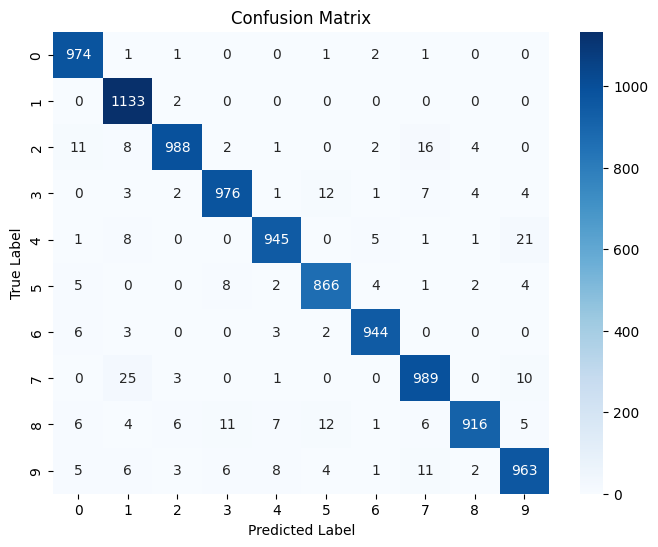

In [ ]:
# k-NN Confusion matrix
conf_matrix = confusion_matrix(y_test_selected, predictions, labels=selected_digits)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=selected_digits, yticklabels=selected_digits)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



## **Naive Bayesian Classification on original data**

In [ ]:
#Naive Bayesian Classification on original data
from collections import defaultdict

class NaiveBayesClassifier:
    def __init__(self):
        self.class_probabilities = defaultdict(float)
        self.feature_probabilities = defaultdict(lambda: defaultdict(float))

    def train(self, X, y):
        num_samples, num_features = X.shape
        unique_classes = np.unique(y)

        # Calculate class probabilities for dataset's class distribution.
        for cls in unique_classes:
            class_samples = X[y == cls]
            self.class_probabilities[cls] = len(class_samples) / num_samples

            # Calculate feature probabilities for each class
            for feature_index in range(num_features):
                feature_values = class_samples[:, feature_index]
                unique_values, counts = np.unique(feature_values, return_counts=True)
                for value, count in zip(unique_values, counts):
                    self.feature_probabilities[cls][(feature_index, value)] += (count + 1) / (len(class_samples) + len(unique_values))

    def predict(self, X):
        predictions = []
        for sample in X:
            max_prob = float('-inf')
            predicted_class = None
            for cls, class_prob in self.class_probabilities.items():
                prob = np.log(class_prob)
                for feature_index, feature_value in enumerate(sample):
                    # Use Laplace smoothing for unseen values
                    prob += np.log(self.feature_probabilities[cls][(feature_index, feature_value)] + 1e-10)
                if prob > max_prob:
                    max_prob = prob
                    predicted_class = cls
            predictions.append(predicted_class)
        return predictions

    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)

# Instantiate the classifier
nb_classifier = NaiveBayesClassifier()

# Train the classifier
nb_classifier.train(X_train_flat, y_train)

# Make predictions on test data
predictions = nb_classifier.predict(X_train_flat)

In [ ]:
# Make predictions on test data
predictions = nb_classifier.predict(X_test_flat)

# Calculate accuracy
acc = nb_classifier.accuracy(y_test, predictions)
print(f"Accuracy: {acc * 100:.2f}%")


Accuracy: 82.44%


In [ ]:
from sklearn.metrics import classification_report

# Calculate precision, recall, and F1-score for each class
class_report = classification_report(y_test, predictions)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       980
           1       0.99      0.90      0.94      1135
           2       0.81      0.85      0.83      1032
           3       0.76      0.83      0.79      1010
           4       0.80      0.79      0.79       982
           5       0.73      0.70      0.72       892
           6       0.89      0.88      0.89       958
           7       0.92      0.81      0.86      1028
           8       0.70      0.76      0.73       974
           9       0.75      0.80      0.77      1009

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.82      0.83     10000



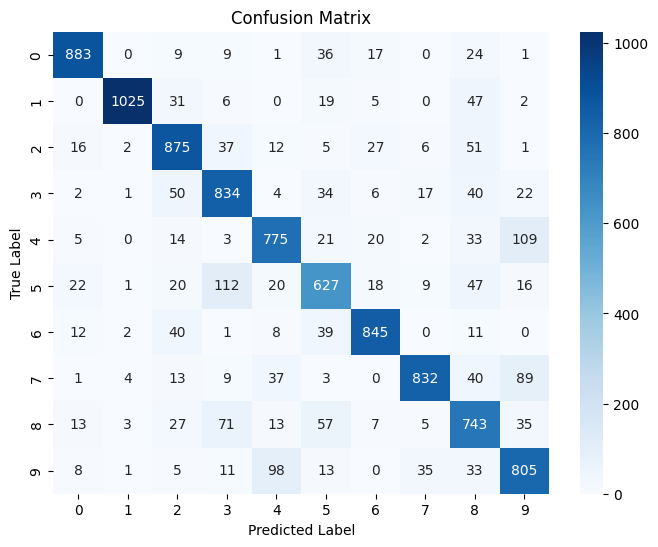

In [ ]:
from sklearn.metrics import confusion_matrix

unique_classes = np.unique(y_test)
combined_conf_matrix = np.zeros((len(unique_classes), len(unique_classes)), dtype=int)

for i, true_cls in enumerate(unique_classes):
    cls_indices = y_test == true_cls
    cls_predictions = np.array(predictions)[cls_indices]
    cls_labels = y_test[cls_indices]

    cls_conf_matrix = confusion_matrix(cls_labels, cls_predictions, labels=unique_classes)
    combined_conf_matrix[i, :] = cls_conf_matrix[i, :]

# Display the combined confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(combined_conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=unique_classes, yticklabels=unique_classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## **Analytical Visualization of the performance of the Algorithms**

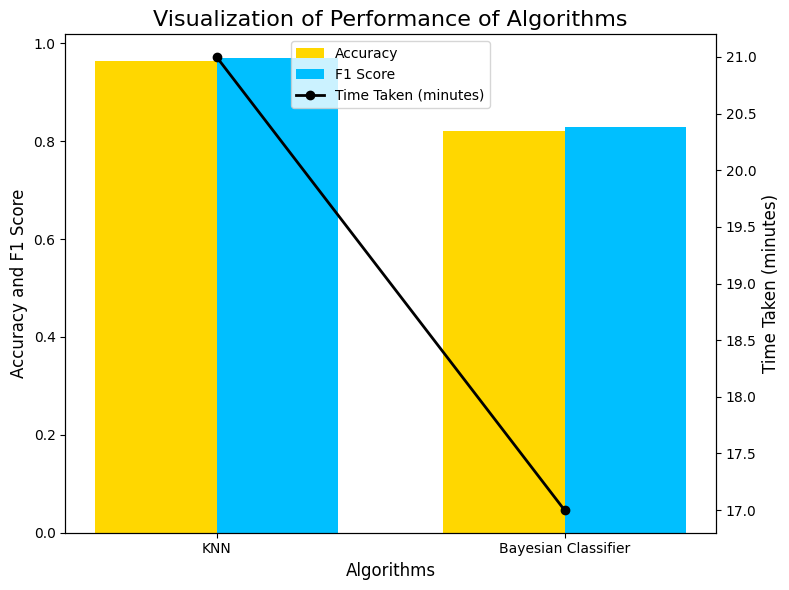

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
algorithms = ['KNN', 'Bayesian Classifier']
accuracy = [0.964, 0.82]
f1_score = [0.97, 0.83]
time_taken = [21, 17]  # in minutes

fig, ax1 = plt.subplots(figsize=(8, 6))

# Plotting accuracy and F1 score
width = 0.35  # Width of each bar
x = np.arange(len(algorithms))  # Generate x-axis locations

bars_acc = ax1.bar(x - width/2, accuracy, color='gold', label='Accuracy', width=width)
bars_f1 = ax1.bar(x + width/2, f1_score, color='deepskyblue', label='F1 Score', width=width)

ax1.set_ylabel('Accuracy and F1 Score', color='black', fontsize=12)
ax1.tick_params('y', colors='black')

# Creating the second y-axis for time taken
ax2 = ax1.twinx()
ax2.plot(algorithms, time_taken, color='black', marker='o', linewidth=2, label='Time Taken (minutes)')
ax2.set_ylabel('Time Taken (minutes)', color='black', fontsize=12)
ax2.tick_params('y', colors='black')

# Title and labels
plt.title('Visualization of Performance of Algorithms', fontsize=16)
ax1.set_xlabel('Algorithms', fontsize=12)
plt.xticks(x, algorithms, fontsize=10)
plt.yticks(fontsize=10)

# Adding legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper center', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
# k-NN precision, recall, and F1-score for each class
class_report = classification_report(y_test_selected, predictions, labels=selected_digits)
print("Classification Report:")
print(class_report)